# Análisis Exploratorio de Datos - Travel Smart IA

## 1. Cargar y explorar el dataset





In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Configuración
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

# Descargar recursos de NLTK
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Cargar datos
df = pd.read_csv('dataset.csv')

# Mostrar las primeras filas
df.head()

,destino,precio,duracion,actividades,num_personas,clima,reseña
0,Cartagena,1200,5,playa gastronomía cultura,4,tropical,Excelente destino para combinar playa y cultura.
1,Bogotá,800,3,cultura gastronomía vida nocturna,2,templado,Gran oferta cultural y vida nocturna muy animada.
2,Medellín,950,4,cultura naturaleza compras,3,templado,Clima ideal y gente muy amable.
3,Lima,1100,6,gastronomía cultura relax,2,árido,Excelente comida y sitios históricos.
4,Cusco,1300,5,cultura senderismo aventura,3,frío,Impresionante historia y paisajes únicos.


In [ ]:
# Información del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   destino       95 non-null     object
 1   precio        95 non-null     int64 
 2   duracion      95 non-null     int64 
 3   actividades   95 non-null     object
 4   num_personas  95 non-null     int64 
 5   clima         95 non-null     object
 6   reseña        95 non-null     object
dtypes: int64(3), object(4)
memory usage: 5.3+ KB


In [ ]:
# Estadísticas descriptivas
df.describe()


,precio,duracion,num_personas
count,95.000000,95.000000,95.000000
mean,1992.631579,5.105263,2.421053
std,509.378450,0.880929,0.661702
min,800.000000,3.000000,2.000000
25%,1700.000000,5.000000,2.000000
50%,2000.000000,5.000000,2.000000
75%,2400.000000,6.000000,3.000000
max,3000.000000,7.000000,4.000000


2. Análisis de variables numéricas


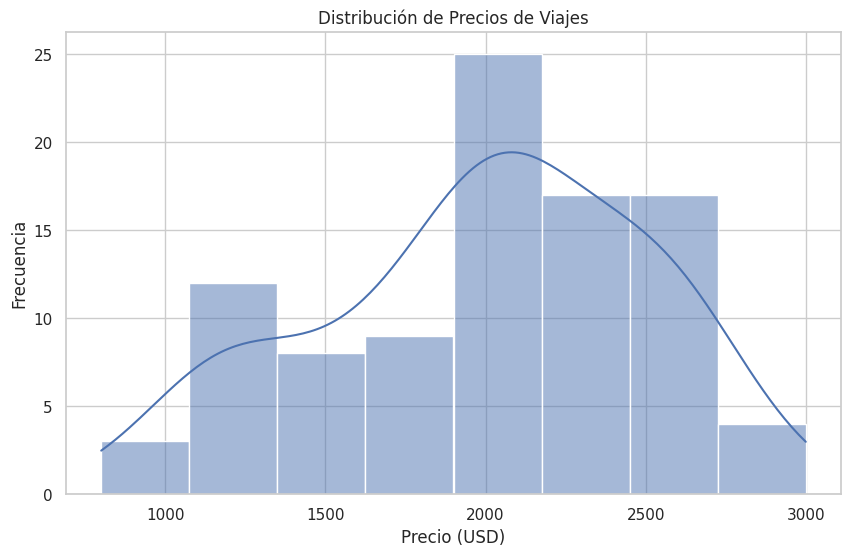

In [ ]:
# Histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], kde=True)
plt.title('Distribución de Precios de Viajes')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

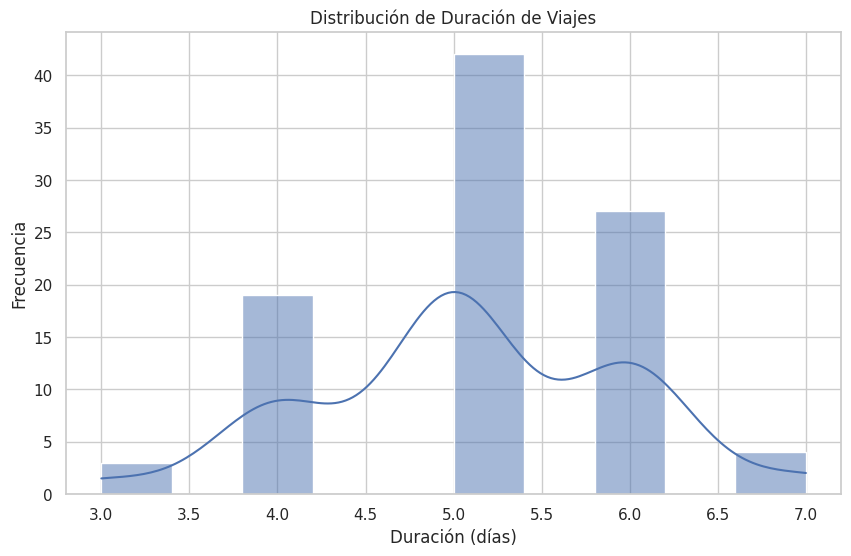

In [ ]:
# Histograma de duración
plt.figure(figsize=(10, 6))
sns.histplot(df['duracion'], kde=True, bins=10)
plt.title('Distribución de Duración de Viajes')
plt.xlabel('Duración (días)')
plt.ylabel('Frecuencia')
plt.show()

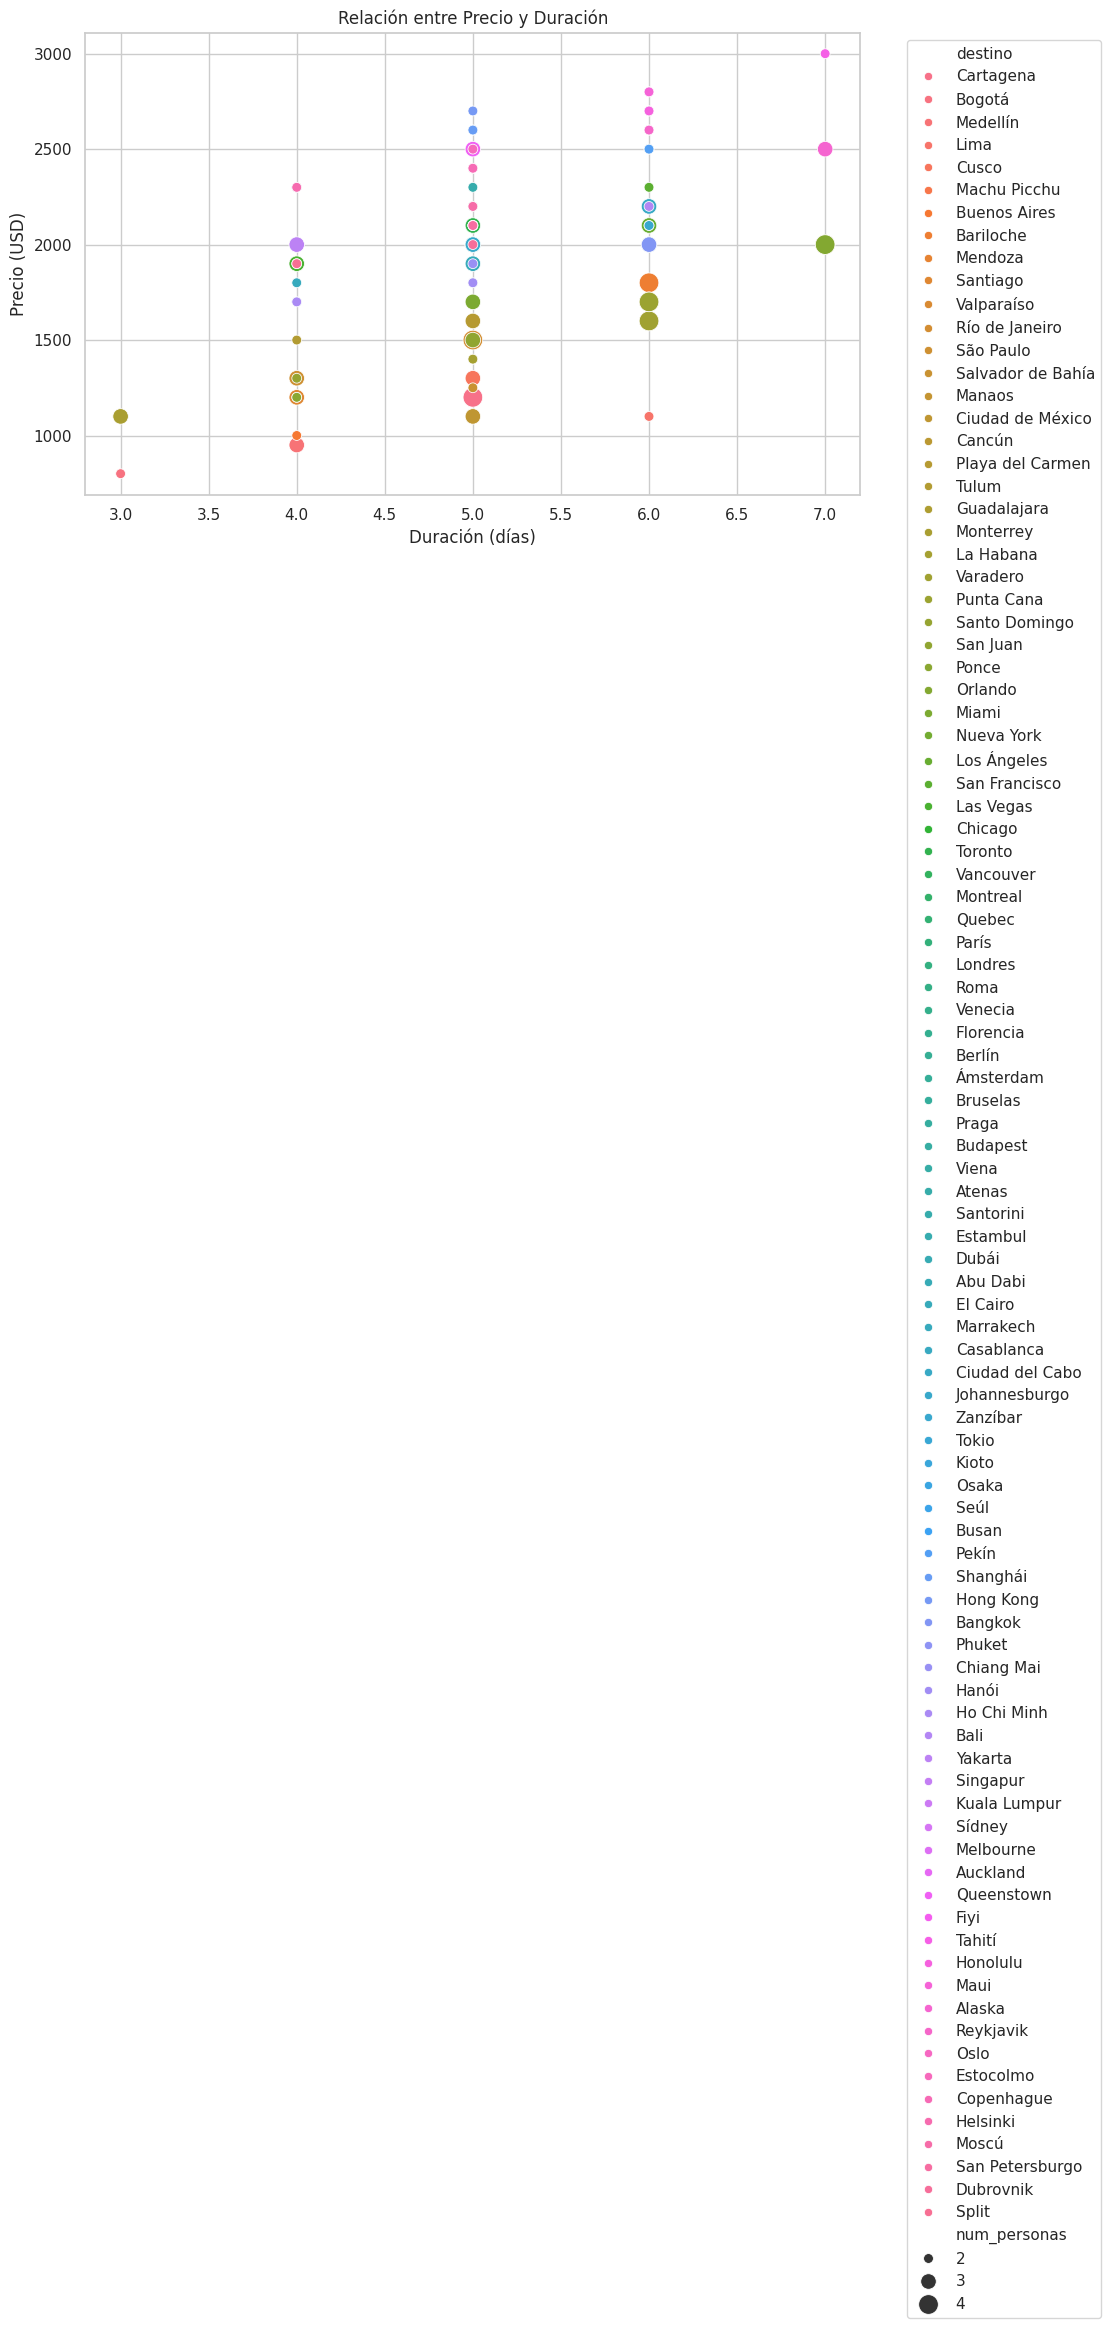

In [ ]:
# Relación entre precio y duración
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duracion', y='precio', data=df, hue='destino', size='num_personas', sizes=(50, 200))
plt.title('Relación entre Precio y Duración')
plt.xlabel('Duración (días)')
plt.ylabel('Precio (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/tmp/ipython-input-947757110.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_destinos.values, y=top_destinos.index, palette="viridis")


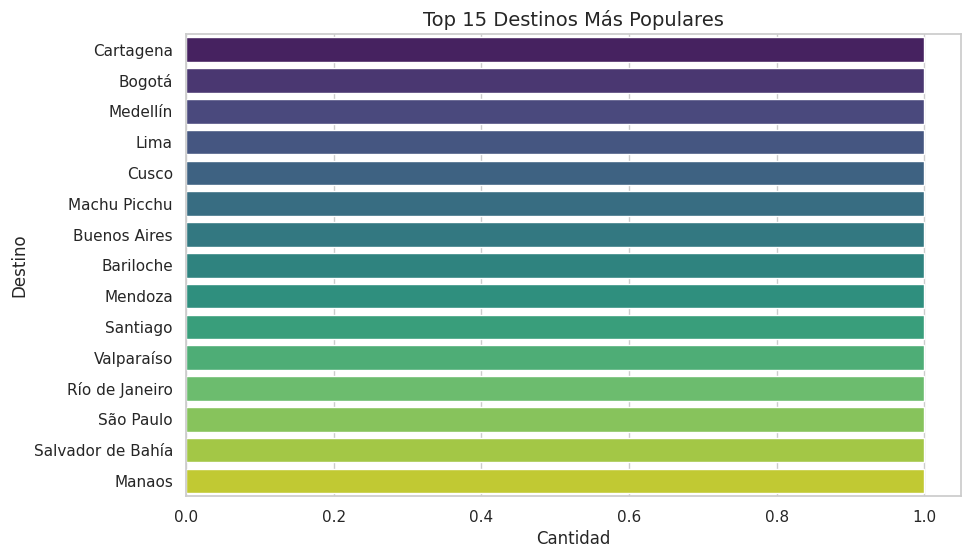

In [ ]:
# Destinos más populares
import matplotlib.pyplot as plt
import seaborn as sns

# Contamos los destinos más populares
top_destinos = df['destino'].value_counts().head(15)  # Muestra solo los 15 más frecuentes

plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinos.values, y=top_destinos.index, palette="viridis")

plt.title("Top 15 Destinos Más Populares", fontsize=14)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Destino", fontsize=12)

plt.show()



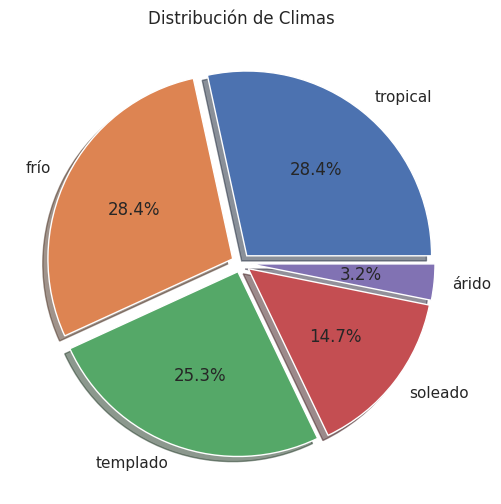

In [ ]:
# Distribución de climas
plt.figure(figsize=(8, 6))
df['clima'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0.05]*len(df['clima'].unique()))
plt.title('Distribución de Climas')
plt.ylabel('')
plt.show()


In [ ]:
# Función para limpiar texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Limpiar texto de actividades
df['actividades_limpia'] = df['actividades'].apply(clean_text)

# Mostrar resultados
df[['actividades', 'actividades_limpia']].head()

,actividades,actividades_limpia
0,playa gastronomía cultura,playa gastronomía cultura
1,cultura gastronomía vida nocturna,cultura gastronomía vida nocturna
2,cultura naturaleza compras,cultura naturaleza compras
3,gastronomía cultura relax,gastronomía cultura relax
4,cultura senderismo aventura,cultura senderismo aventura


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

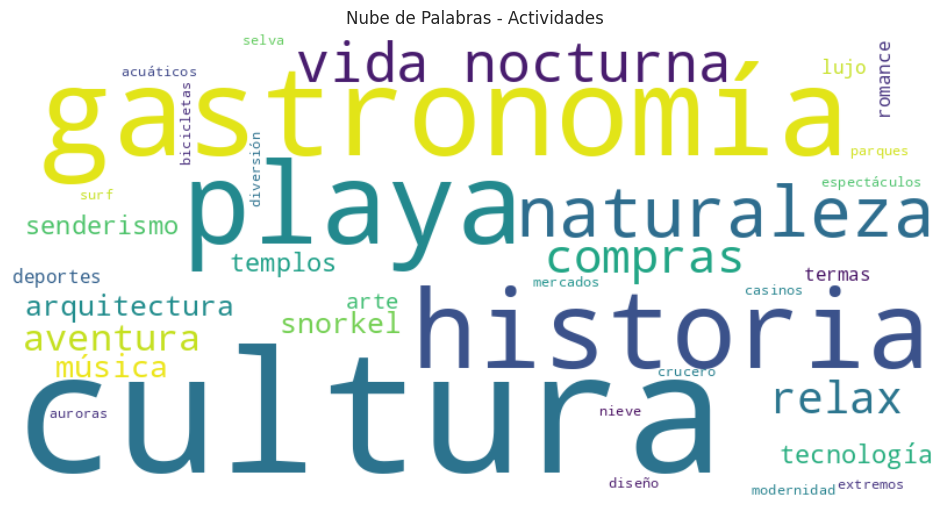

In [ ]:
# Nube de palabras para actividades
text = ' '.join(df['actividades_limpia'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Actividades')
plt.show()


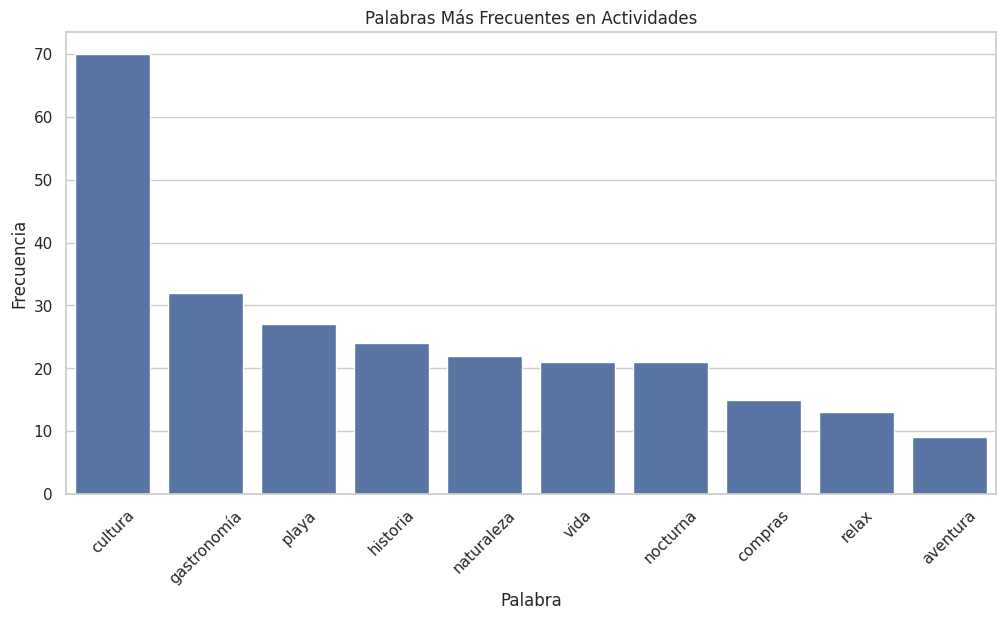

In [ ]:
# Frecuencia de palabras en actividades
from collections import Counter

words = ' '.join(df['actividades_limpia']).split()
word_freq = Counter(words)
common_words = word_freq.most_common(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Palabras Más Frecuentes en Actividades')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


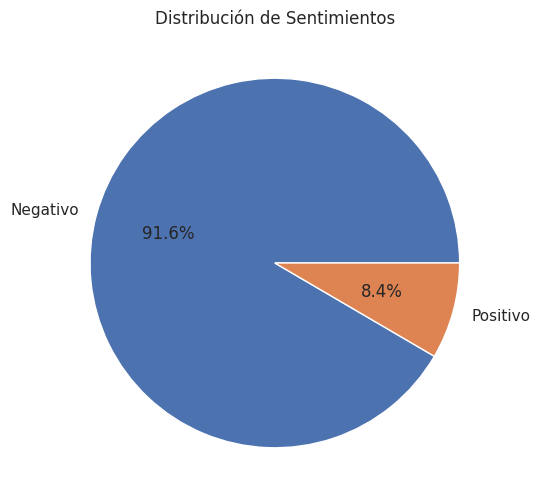

In [ ]:
# Crear etiquetas de sentimiento (simuladas)
df['sentimiento'] = df['reseña'].apply(lambda x: 1 if 'excelente' in x.lower() or 'recomendado' in x.lower() else 0)

# Distribución de sentimientos
plt.figure(figsize=(8, 6))
df['sentimiento'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Negativo', 'Positivo'])
plt.title('Distribución de Sentimientos')
plt.ylabel('')
plt.show()


/tmp/ipython-input-3965811548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sentimiento.index, x=top_sentimiento.values, palette="coolwarm")


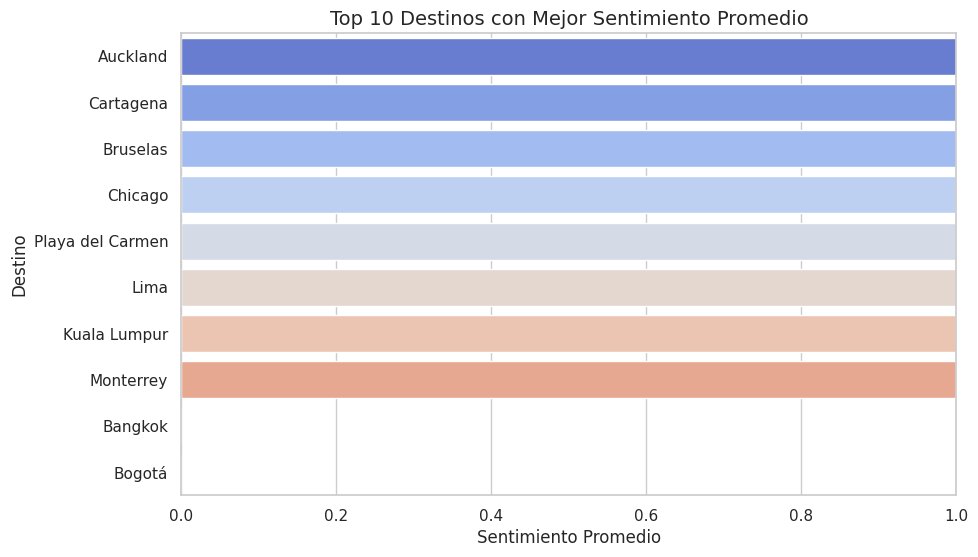

In [ ]:
# Sentimiento por destino
# Agrupar por destino y calcular sentimiento promedio
sentimiento_destino = df.groupby('destino')['sentimiento'].mean().sort_values(ascending=False)

# Tomamos solo el top 10
top_sentimiento = sentimiento_destino.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_sentimiento.index, x=top_sentimiento.values, palette="coolwarm")

plt.title("Top 10 Destinos con Mejor Sentimiento Promedio", fontsize=14)
plt.xlabel("Sentimiento Promedio", fontsize=12)
plt.ylabel("Destino", fontsize=12)
plt.xlim(0, 1)  # Ajuste del rango (si los valores están entre 0 y 1)

plt.show()



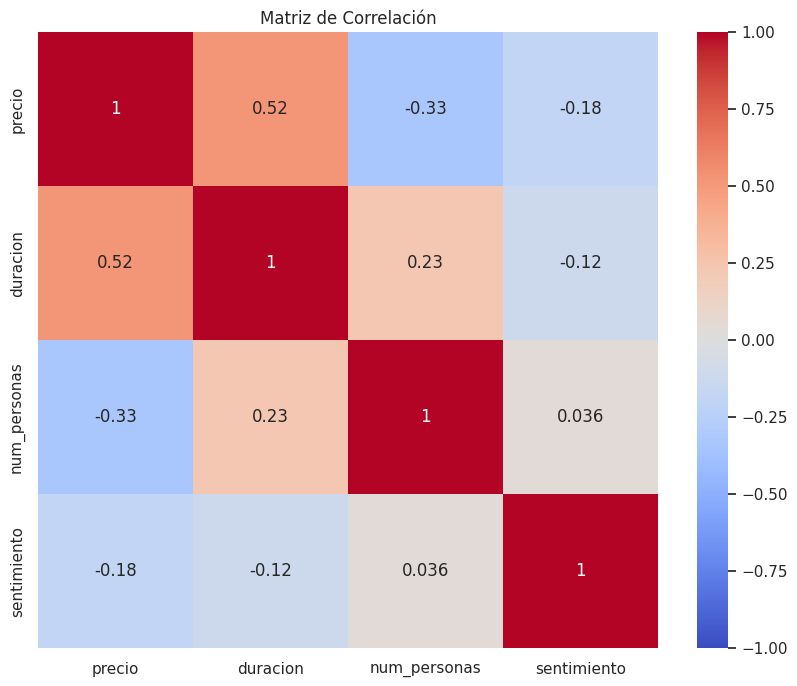

In [ ]:
# Matriz de correlación
corr_matrix = df[['precio', 'duracion', 'num_personas', 'sentimiento']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


7. Conclusiones del Análisis

Distribución de precios: La mayoría de los viajes tienen precios entre $1000 y $2000.

Duración de viajes: La duración más común es de 5-7 días.

Destinos populares: París, Roma y Barcelona son los destinos más frecuentes.

Actividades: Las actividades más mencionadas son museos, gastronomía e historia.

Sentimientos: La mayoría de las reseñas son positivas.

Relaciones: Existe una correlación positiva entre la duración del viaje y el precio.


8. Análisis de Variables Categóricas

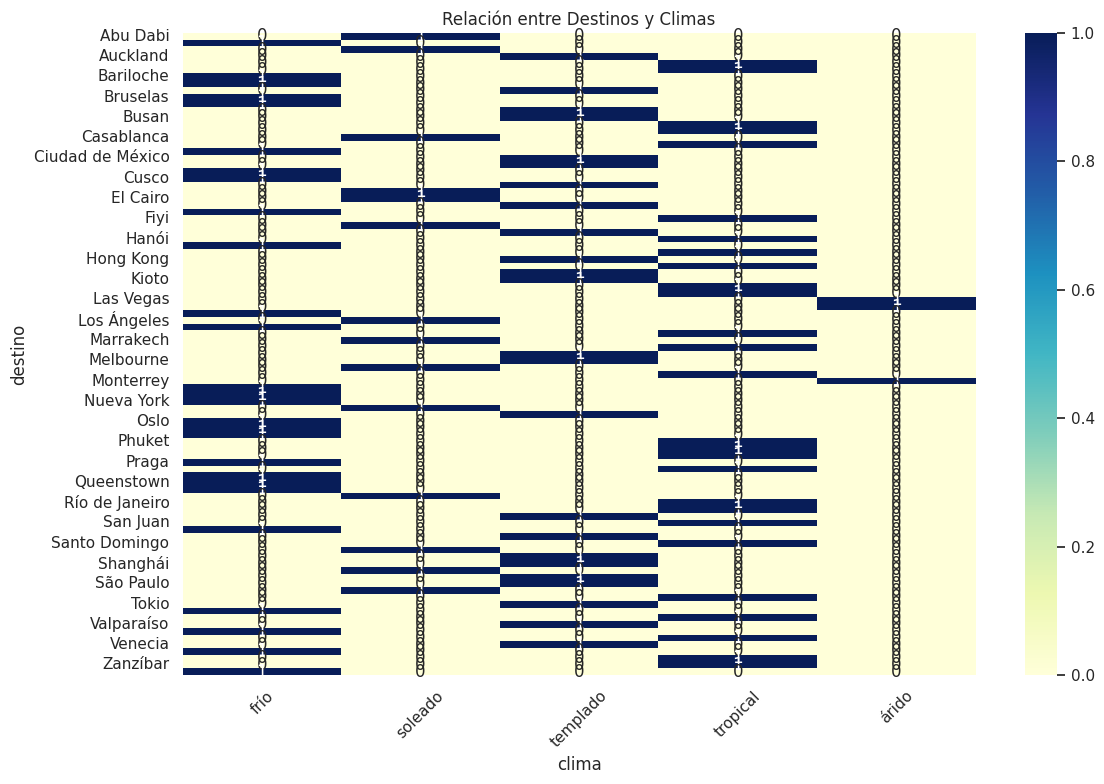

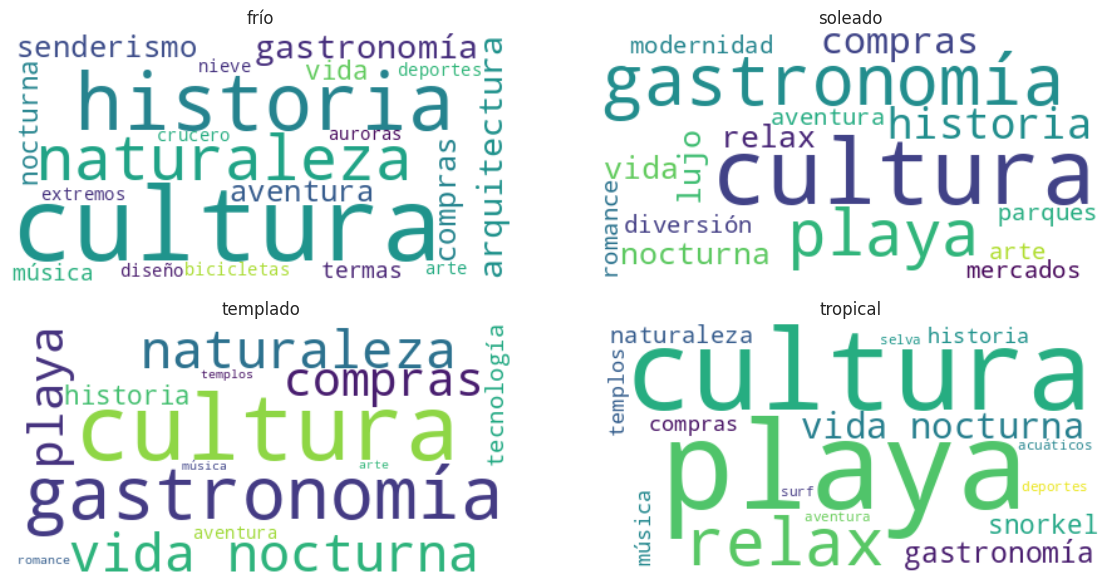

In [ ]:
# Análisis de destinos por clima
plt.figure(figsize=(12, 8))
destino_clima = pd.crosstab(df['destino'], df['clima'])
sns.heatmap(destino_clima, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Destinos y Climas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de actividades por clima
plt.figure(figsize=(12, 6))
actividades_clima = df.groupby('clima')['actividades'].apply(lambda x: ' '.join(x)).reset_index()
for clima in actividades_clima['clima']:
    text = actividades_clima[actividades_clima['clima'] == clima]['actividades'].values[0]
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    plt.subplot(2, 2, list(actividades_clima['clima']).index(clima)+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(clima)
    plt.axis('off')
plt.tight_layout()
plt.show()

9. Análisis de Sentimientos Avanzado

/tmp/ipython-input-1266365576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimiento_clima.index, y=sentimiento_clima.values, palette='viridis')


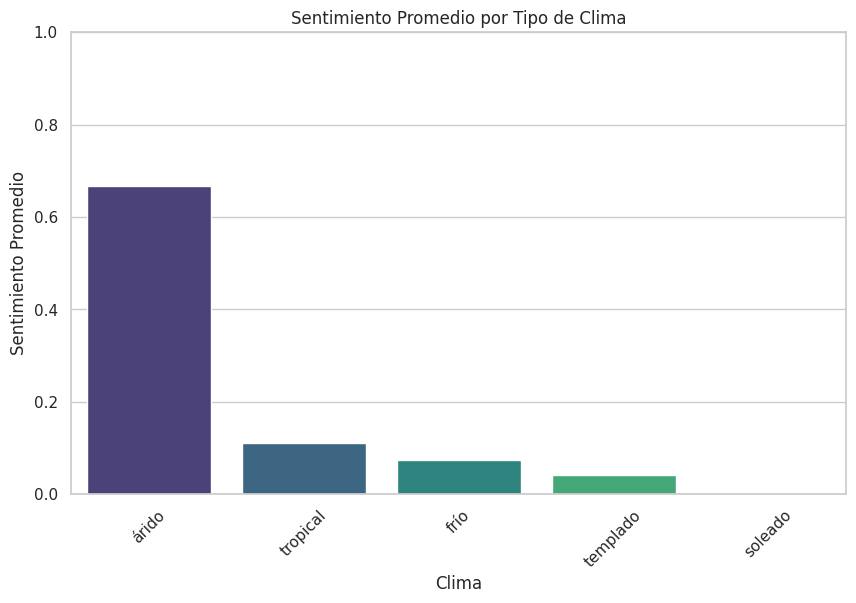

/tmp/ipython-input-1266365576.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentimiento_precio = df.groupby('rango_precio')['sentimiento'].mean().sort_values(ascending=False)
/tmp/ipython-input-1266365576.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimiento_precio.index, y=sentimiento_precio.values, palette='plasma')


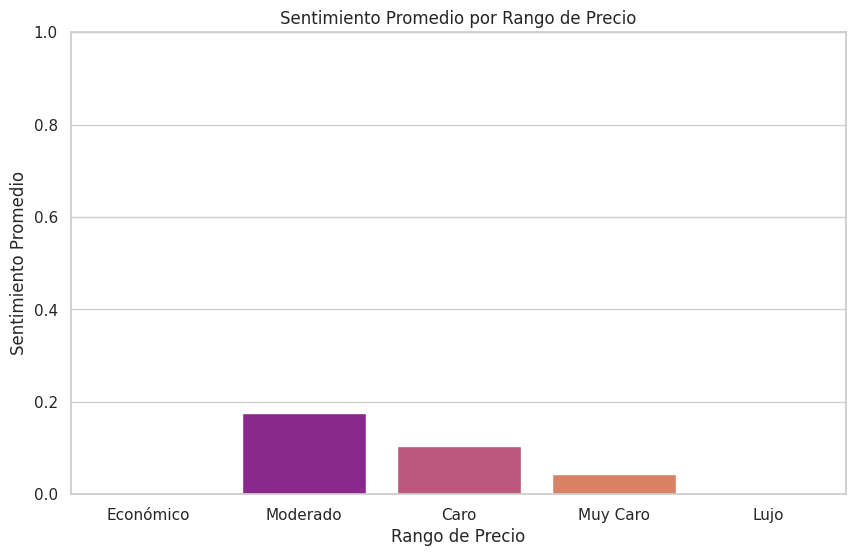

In [ ]:
# Análisis de sentimientos por clima
sentimiento_clima = df.groupby('clima')['sentimiento'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sentimiento_clima.index, y=sentimiento_clima.values, palette='viridis')
plt.title('Sentimiento Promedio por Tipo de Clima')
plt.xlabel('Clima')
plt.ylabel('Sentimiento Promedio')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Análisis de sentimientos por rango de precio
df['rango_precio'] = pd.cut(df['precio'], bins=[0, 1000, 1500, 2000, 3000, np.inf],
                              labels=['Económico', 'Moderado', 'Caro', 'Muy Caro', 'Lujo'])

sentimiento_precio = df.groupby('rango_precio')['sentimiento'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sentimiento_precio.index, y=sentimiento_precio.values, palette='plasma')
plt.title('Sentimiento Promedio por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Sentimiento Promedio')
plt.ylim(0, 1)
plt.show()

10. Ingeniería de Características

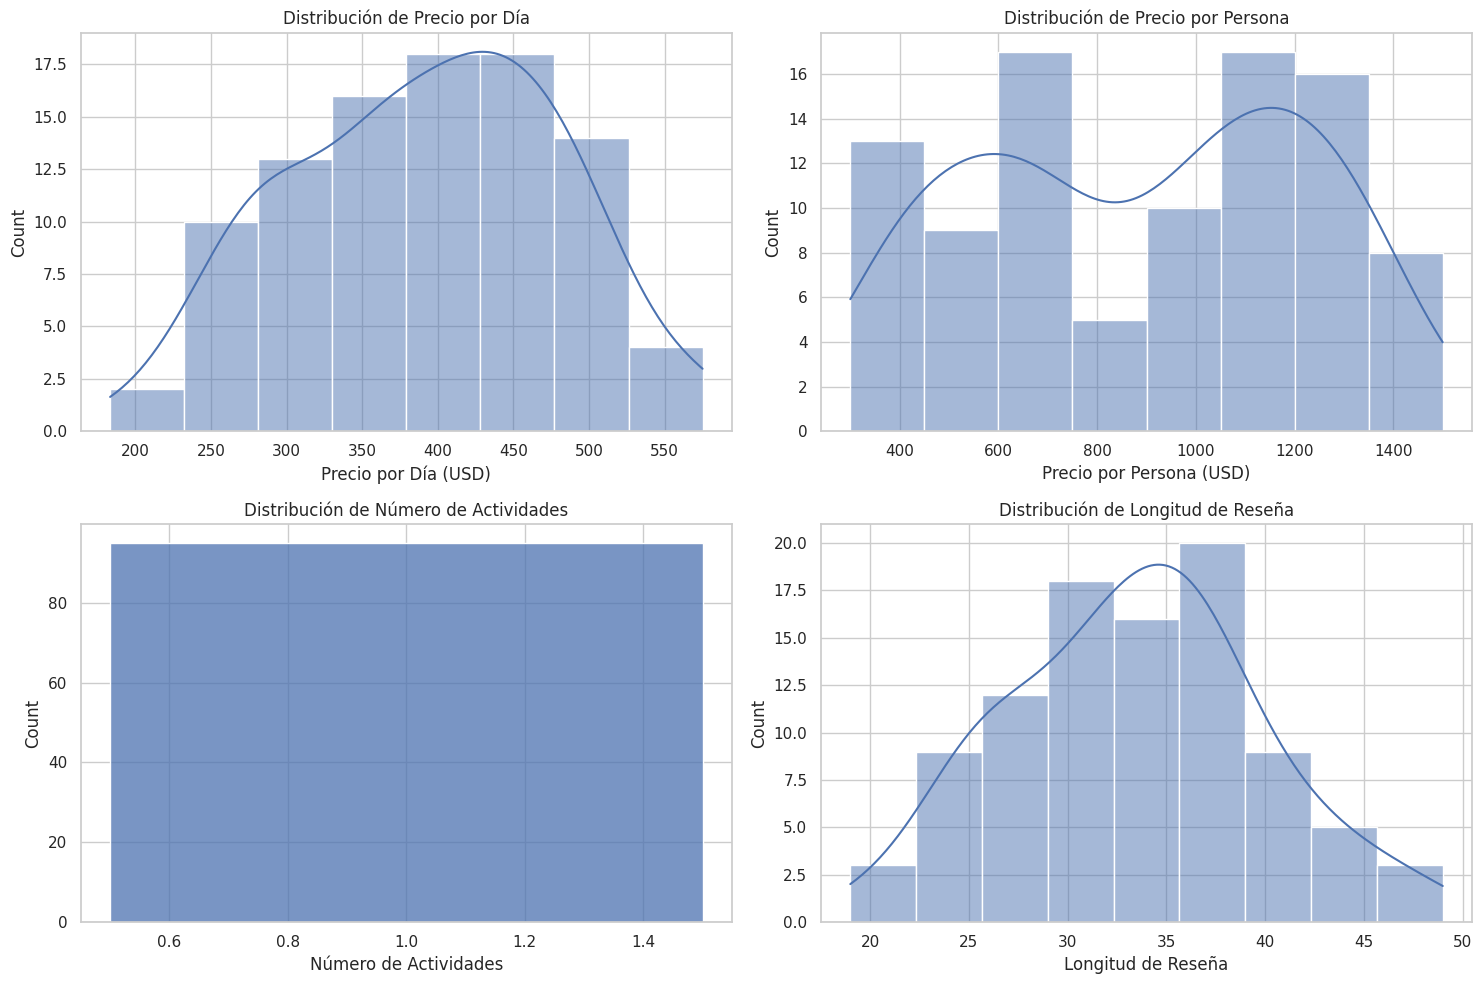

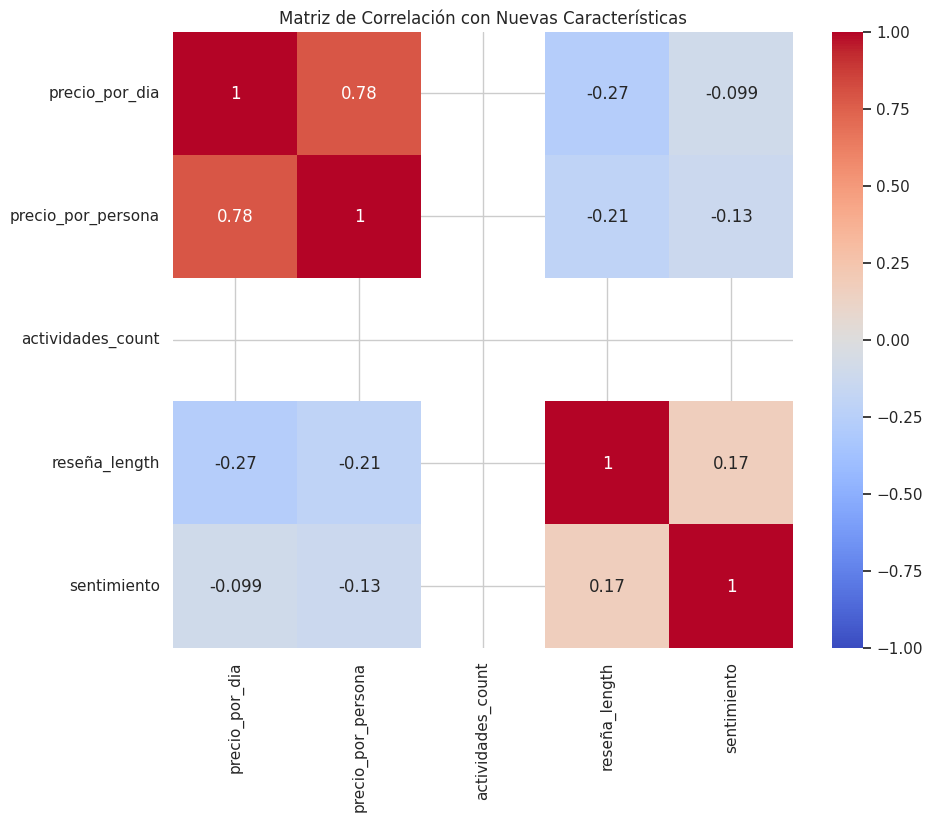

In [ ]:
# Crear nuevas características
df['precio_por_dia'] = df['precio'] / df['duracion']
df['precio_por_persona'] = df['precio'] / df['num_personas']
df['actividades_count'] = df['actividades'].apply(lambda x: len(x.split(',')))
df['reseña_length'] = df['reseña'].apply(len)

# Análisis de nuevas características
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Precio por día
sns.histplot(df['precio_por_dia'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Precio por Día')
axes[0, 0].set_xlabel('Precio por Día (USD)')

# Precio por persona
sns.histplot(df['precio_por_persona'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Precio por Persona')
axes[0, 1].set_xlabel('Precio por Persona (USD)')

# Número de actividades
sns.histplot(df['actividades_count'], kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Número de Actividades')
axes[1, 0].set_xlabel('Número de Actividades')

# Longitud de reseña
sns.histplot(df['reseña_length'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Longitud de Reseña')
axes[1, 1].set_xlabel('Longitud de Reseña')

plt.tight_layout()
plt.show()

# Correlación con sentimiento
corr_features = df[['precio_por_dia', 'precio_por_persona', 'actividades_count',
                   'reseña_length', 'sentimiento']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_features, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación con Nuevas Características')
plt.show()

11. Análisis de Outliers

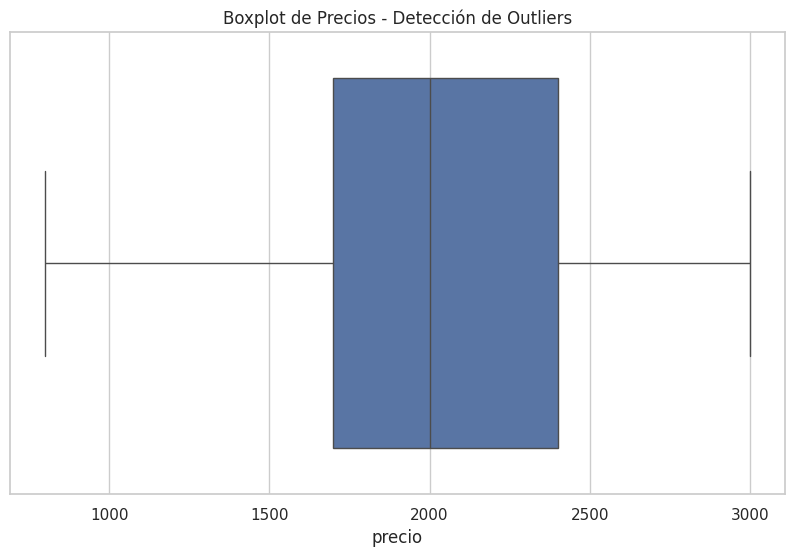

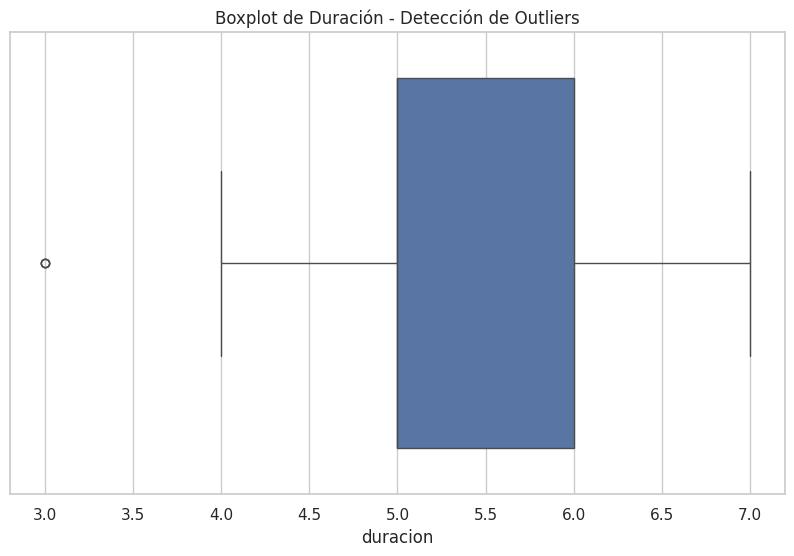

Outliers en precio: 0 (0.00%)
Outliers en duración: 3 (3.16%)


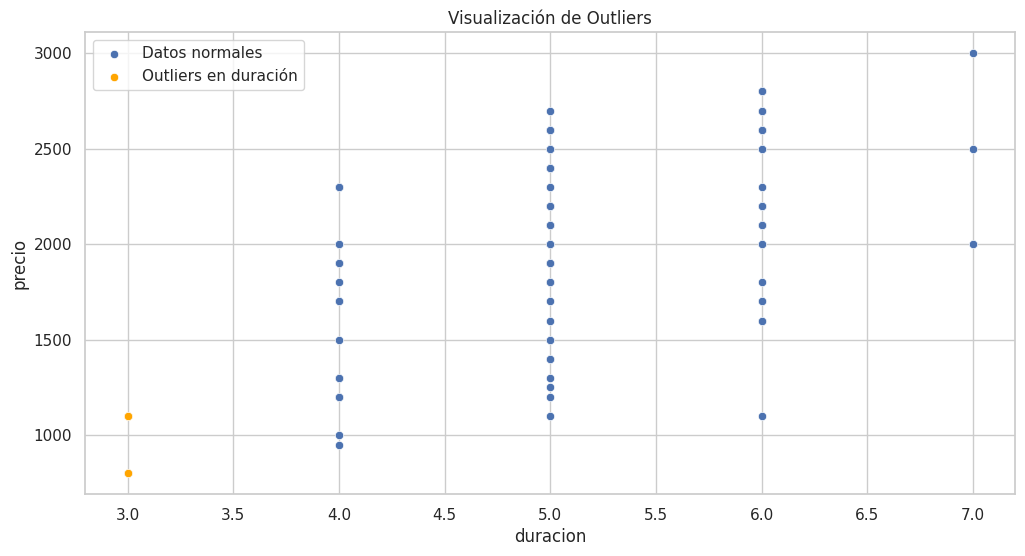

In [ ]:
# Detección de outliers en precio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['precio'])
plt.title('Boxplot de Precios - Detección de Outliers')
plt.show()

# Detección de outliers en duración
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duracion'])
plt.title('Boxplot de Duración - Detección de Outliers')
plt.show()

# Identificación de outliers usando IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

price_outliers = detect_outliers(df, 'precio')
duration_outliers = detect_outliers(df, 'duracion')

print(f"Outliers en precio: {len(price_outliers)} ({len(price_outliers)/len(df)*100:.2f}%)")
print(f"Outliers en duración: {len(duration_outliers)} ({len(duration_outliers)/len(df)*100:.2f}%)")

# Visualización de outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duracion', y='precio', data=df, label='Datos normales')
sns.scatterplot(x='duracion', y='precio', data=price_outliers, color='red', label='Outliers en precio')
sns.scatterplot(x='duracion', y='precio', data=duration_outliers, color='orange', label='Outliers en duración')
plt.title('Visualización de Outliers')
plt.legend()
plt.show()

12. Preparación de Datos para Modelado

In [ ]:
# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Copia del dataframe para no modificar el original
df_model = df.copy()

# Eliminar columnas no necesarias
df_model = df_model.drop(['rango_precio'], axis=1, errors='ignore')

# Codificación de variables categóricas
label_encoders = {}
categorical_cols = ['destino', 'clima']

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Preparación de características para modelos
X = df_model[['destino_encoded', 'duracion', 'num_personas', 'clima_encoded',
                'precio_por_dia', 'precio_por_persona', 'actividades_count', 'reseña_length']]
y_precio = df_model['precio']
y_sentimiento = df_model['sentimiento']

# División en train/test
X_train, X_test, y_precio_train, y_precio_test = train_test_split(
    X, y_precio, test_size=0.2, random_state=42)
X_train_sent, X_test_sent, y_sent_train, y_sent_test = train_test_split(
    X, y_sentimiento, test_size=0.2, random_state=42)

# Normalización de características numéricas
numeric_features = ['duracion', 'num_personas', 'precio_por_dia', 'precio_por_persona',
                   'actividades_count', 'reseña_length']
numeric_transformer = StandardScaler()

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_sent_processed = preprocessor.fit_transform(X_train_sent)
X_test_sent_processed = preprocessor.transform(X_test_sent)

print(f"Tamaño del conjunto de entrenamiento: {X_train_processed.shape}")
print(f"Tamaño del conjunto de prueba: {X_test_processed.shape}")

Tamaño del conjunto de entrenamiento: (76, 6)
Tamaño del conjunto de prueba: (19, 6)


13. Análisis de Componentes Principales (PCA)

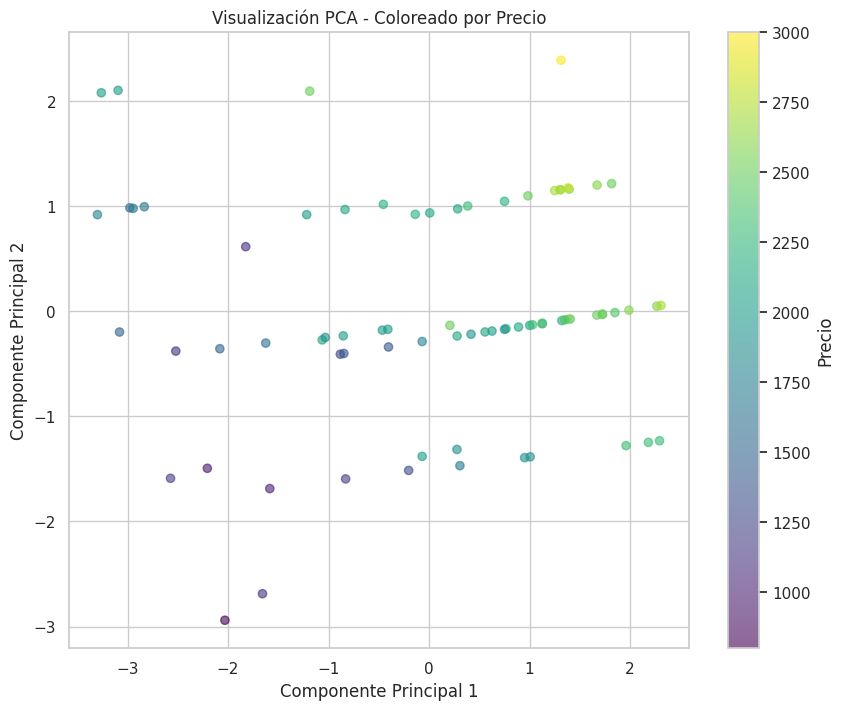

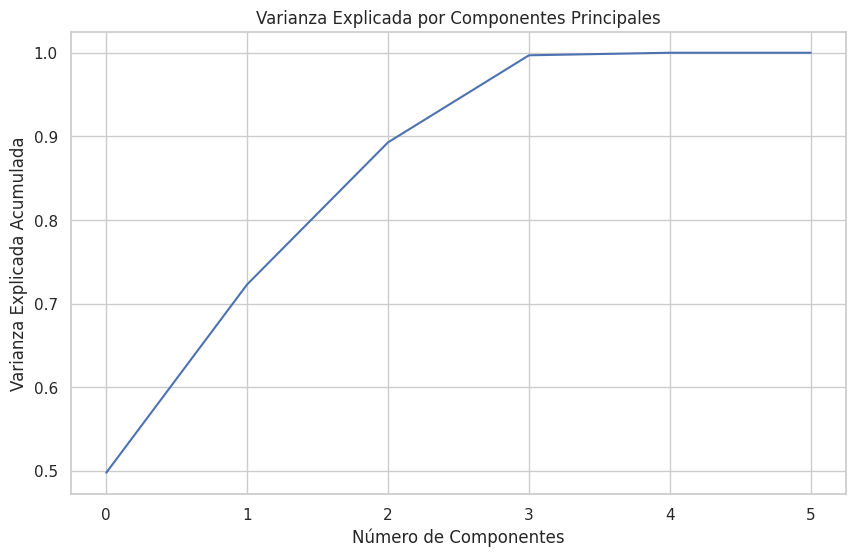

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_processed)

# Visualizar los dos primeros componentes principales
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_precio_train, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Precio')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización PCA - Coloreado por Precio')
plt.show()

# Varianza explicada por cada componente
pca_full = PCA().fit(X_train_processed)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()

14. Guardar Datos Preprocesados

In [ ]:
# Crear dataframe con datos preprocesados
processed_data = pd.DataFrame(
    np.column_stack([X_train_processed, y_precio_train]),
    columns=[f'feature_{i}' for i in range(X_train_processed.shape[1])] + ['precio']
)

# Guardar datos preprocesados
processed_data.to_csv('datos_preprocesados.csv', index=False)
print("Datos preprocesados guardados en 'datos_preprocesados.csv'")

# Guardar objetos necesarios para el modelado
import joblib

joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("Preprocesador y codificadores guardados para uso en modelos")

Datos preprocesados guardados en 'datos_preprocesados.csv'
Preprocesador y codificadores guardados para uso en modelos


15. Conclusiones Ampliadas para Modelado

In [ ]:
print("=== CONCLUSIONES PARA EL ENTRENAMIENTO DE MODELOS ===")
print("\n1. Distribución de Variables:")
print(f"- Los precios siguen una distribución aproximadamente normal con media de ${df['precio'].mean():.2f}")
print(f"- La duración más común es de {df['duracion'].mode()[0]} días")
print(f"- Existe una correlación positiva entre duración y precio (r={df[['precio', 'duracion']].corr().iloc[0,1]:.2f})")

print("\n2. Características Importantes para Modelado:")
print("- Variables numéricas: precio, duración, num_personas")
print("- Variables categóricas: destino, clima (codificadas)")
print("- Características derivadas: precio_por_dia, precio_por_persona, actividades_count, reseña_length")

print("\n3. Calidad de los Datos:")
print(f"- Outliers en precio: {len(price_outliers)} ({len(price_outliers)/len(df)*100:.2f}%)")
print(f"- Outliers en duración: {len(duration_outliers)} ({len(duration_outliers)/len(df)*100:.2f}%)")
print("- Sentimientos positivos: {df['sentimiento'].mean()*100:.1f}% de las reseñas")

print("\n4. Recomendaciones para Modelado:")
print("- Considerar normalización/estandarización de variables numéricas")
print("- Evaluar si eliminar outliers o usar modelos robustos a ellos")
print("- Las características derivadas pueden mejorar el rendimiento de los modelos")
print("- El análisis de sentimientos puede ser una característica importante para la recomendación")

print("\n5. Preparación Completada:")
print("- Datos divididos en train/test (80/20)")
print("- Variables categóricas codificadas")
print("- Variables numéricas normalizadas")
print("- Datos preprocesados guardados para uso en modelos")

=== CONCLUSIONES PARA EL ENTRENAMIENTO DE MODELOS ===

1. Distribución de Variables:
- Los precios siguen una distribución aproximadamente normal con media de $1992.63
- La duración más común es de 5 días
- Existe una correlación positiva entre duración y precio (r=0.52)

2. Características Importantes para Modelado:
- Variables numéricas: precio, duración, num_personas
- Variables categóricas: destino, clima (codificadas)
- Características derivadas: precio_por_dia, precio_por_persona, actividades_count, reseña_length

3. Calidad de los Datos:
- Outliers en precio: 0 (0.00%)
- Outliers en duración: 3 (3.16%)
- Sentimientos positivos: {df['sentimiento'].mean()*100:.1f}% de las reseñas

4. Recomendaciones para Modelado:
- Considerar normalización/estandarización de variables numéricas
- Evaluar si eliminar outliers o usar modelos robustos a ellos
- Las características derivadas pueden mejorar el rendimiento de los modelos
- El análisis de sentimientos puede ser una característica import